In [6]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import math 
import random



In [7]:
def InitData (splitData=False,splitFreq=3,splitRatio = 0.5):
    dataframe = pd.read_csv(r"C:\Users\user\Downloads\iris.csv",header=1)
    labledData = dataframe.iloc[:,1:].to_numpy()
    trainData = dataframe.iloc[:,1:5].to_numpy()

    if splitData:
        fuck = dataframe.iloc[:,-1].values
        species = np.empty((0, ))
        labledTest = np.empty((5, ))
        labledTrain = np.empty((5, ))
        for i in range(0,len(labledData),splitFreq): 
            if random.randint(0,9)//(splitRatio*10):
                labledTest = np.vstack((labledTest,labledData[i:i+splitFreq]))
            else:
                labledTrain = np.vstack((labledTrain,labledData[i:i+splitFreq]))
        print(labledTest[0])
        labledTest = np.delete(labledTest,0,axis=0)
        print(labledTest[0])
        labledTrain = np.delete(labledTrain,0,axis=0)

        return labledTest,labledTrain
    return labledData,trainData

In [8]:
splitData = True
splitFreq = 3
splitRatio = 0.5
if splitData:
    labledTrain,labledTest = InitData(splitData=splitData,splitFreq=splitFreq,splitRatio=splitRatio)
else:
    labledData,rawData = InitData()

[1.0 1.0 1.0 1.0 1.0]
[5.1 3.5 1.4 0.2 'I.\xa0setosa']


In [9]:
def calcDistance(a,b):
    sum = 0
    for i in range(len(a)):
        if isinstance(a[i],float):
            sum = sum+ (a[i]-b[i])**2
    return math.sqrt(sum)


In [10]:
def PlotGraph(displayData,axisToPlot,colorData = None):
    plotData = displayData.transpose()
    if colorData == None:
        colorArray = {"I. setosa":0.3,"I. versicolor":0.6,"I. virginica":0.9}
        temp = [colorArray[a] for a in plotData[4]]
        plotData = np.vstack((plotData,temp))
        print("nocolor")
        axisToPlot.scatter(plotData[0],plotData[1],plotData[2], c=plotData[5])
    else:
        print("color")
        plotData = np.vstack((plotData,colorData))
        axisToPlot.scatter(plotData[0],plotData[1],plotData[2], c=plotData[5])


In [11]:
def ModelTrain(modelData,testData,strPosition = 4):        
        myPair = [0,]
        returnArray = []
        for testCase in modelData:
                myPair = [calcDistance(testCase,testData),testCase[strPosition]]
                returnArray.append(myPair)
        returnArray = np.array(returnArray)
        returnArray = returnArray[returnArray[:,0].argsort()]
        return returnArray#return sorted array of closest type [[0,type]]
def Knn(resultArray,depth):
        colorArray = {"I. setosa":0.3,"I. versicolor":0.6,"I. virginica":0.9}
        sum = 0
        for i in range(depth):
                sum = sum + colorArray[resultArray[i][1]]
        return (sum/depth)#return knn result as int


nocolor
color


C:\Users\user\AppData\Local\Temp\ipykernel_9540\4137557728.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


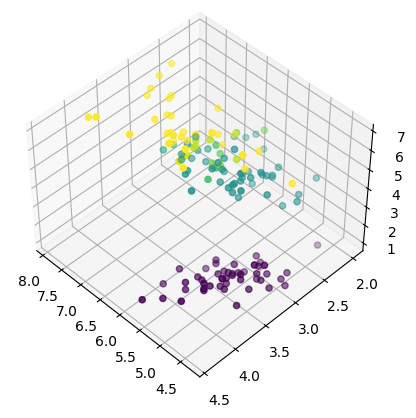

In [12]:
knnResult = []
for test in labledTest:
    knnResult.append(Knn(ModelTrain(labledTrain,test),10))
figure = plt.figure()
ax1 = figure.add_subplot(projection='3d')
ax1.view_init(azim=135,elev=45)
showTest = np.copy(labledTest)
PlotGraph(labledTrain,ax1)
PlotGraph(labledTest,ax1,knnResult)
figure.show()

